Data import

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("ecom_data.csv",encoding="ISO-8859-1")
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])
data["TotalSpend"]=data["Quantity"]*data["UnitPrice"]

Aggregation

In [18]:
customer_data=data.groupby("CustomerID").agg({"InvoiceDate": lambda x:(x.max()-x.min()).days,
                                              "InvoiceNo":"count",
                                              "TotalSpend":"sum"
                                             }).rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency"})

In [19]:
customer_data

,Recency,Frequency,TotalSpend
CustomerID,,,
12346.0,0,2,0.00
12347.0,365,182,4310.00
12348.0,282,31,1797.24
12349.0,0,73,1757.55
12350.0,0,17,334.40
...,...,...,...
18280.0,0,10,180.60
18281.0,0,7,80.82
18282.0,118,13,176.60


Elbow Method


C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\clust

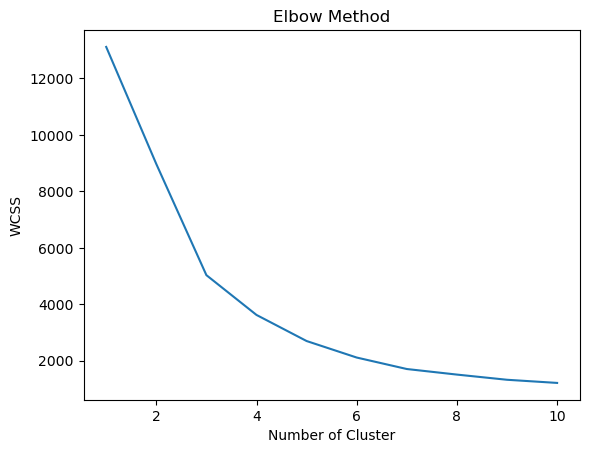

In [27]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(customer_data[["Recency","Frequency","TotalSpend"]])

wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

KMeans CLuster

In [29]:
optimal_clusters=4
kmeans=KMeans(n_clusters=optimal_clusters,random_state=42)
customer_data["Cluster"]=kmeans.fit_predict(scaled_features)

C:\Users\qianf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
cluster_analysis=customer_data.groupby("Cluster").agg({
    "Recency":"mean",
    "Frequency": "mean",
    "TotalSpend":"mean"
})

In [31]:
cluster_analysis

,Recency,Frequency,TotalSpend
Cluster,,,
0,32.419681,37.385842,591.700697
1,277.258371,157.358817,3102.219666
2,350.600000,1013.400000,192103.854000
3,303.000000,5914.000000,64776.602500
